In [3]:
!pip install git+https://github.com/qubvel/classification_models.git


  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-vad6ydqb
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/classification_models.git /tmp/pip-req-build-vad6ydqb
  Resolved https://github.com/qubvel/classification_models.git to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from classification_models.keras import Classifiers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from classification_models.keras import Classifiers
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np

ResNet18, preprocess_input = Classifiers.get('resnet18')

In [5]:
def build_custom_resnet18():
    # Load ResNet18 without the top layer (no pre-trained weights)
    resnet_base = ResNet18(weights=None, include_top=False, input_shape=(32, 32, 3))

    # Adding custom top layers using GlobalAveragePooling2D
    pooled_output = GlobalAveragePooling2D()(resnet_base.output)  # Alternative to Flatten
    dense_layer = Dense(128, activation='relu')(pooled_output)
    dropout_layer = Dropout(0.5)(dense_layer)
    final_output = Dense(10, activation='softmax')(dropout_layer)  # CIFAR-10 has 10 classes

    # Defining the model
    model = Model(inputs=resnet_base.input, outputs=final_output)
    return model

In [6]:
# Import ResNet18 model and its preprocessing function
ResNet18, preprocess_input = Classifiers.get('resnet18')  # Change 'resnet18' as needed

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalization

# Set up data augmentation with preprocessing
augmentation_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Apply model-specific preprocessing
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Reserve 20% of training data for validation
)

# Create generators for training and validation data
training_generator = augmentation_gen.flow(train_images, train_labels, batch_size=32, subset='training')
validation_generator = augmentation_gen.flow(train_images, train_labels, batch_size=32, subset='validation')
# Print the shapes of the datasets to confirm successful loading
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [7]:
def build_custom_mobilenet():
    # Initialize MobileNet base model without the top classification layer
    mobilenet_base = tf.keras.applications.MobileNet(weights=None, include_top=False, input_shape=(32, 32, 3))

    # Add custom layers on top of the base model
    global_pooling = GlobalAveragePooling2D()(mobilenet_base.output)  # Alternative to Flatten
    dense_layer = Dense(128, activation='relu')(global_pooling)
    dropout_layer = Dropout(0.5)(dense_layer)
    final_output = Dense(10, activation='softmax')(dropout_layer)  # 10 classes for CIFAR-10

    # Define the complete model
    custom_model = Model(inputs=mobilenet_base.input, outputs=final_output)
    return custom_model


In [8]:
resnet_model = build_custom_resnet18()
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train ResNet-18
resnet_history = resnet_model.fit(
    training_generator,
    epochs=20,
    validation_data=validation_generator
)

# Compile and train MobileNet model using SGD optimizer with a learning rate of 0.01
mobilenet_model = build_custom_mobilenet()
mobilenet_model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train MobileNet
mobilenet_history = mobilenet_model.fit(
    training_generator,
    epochs=20,
    validation_data=validation_generator
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.2829 - loss: 1.9650 - val_accuracy: 0.4386 - val_loss: 1.6039
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.4502 - loss: 1.5386 - val_accuracy: 0.4953 - val_loss: 1.3930
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.5206 - loss: 1.3763 - val_accuracy: 0.5452 - val_loss: 1.3330
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 37ms/step - accuracy: 0.5617 - loss: 1.2643 - val_accuracy: 0.6161 - val_loss: 1.0839
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.6067 - loss: 1.1603 - val_accuracy: 0.6326 - val_loss: 1.0308
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.6358 - loss: 1.0841 - val_accuracy: 0.6461 - val_loss: 1.0096
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.6573 - loss: 1.0137 - val_accuracy: 0.6826 - val_loss: 0.9219
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.6773 - loss: 0.96

313/313 - 1s - 3ms/step - accuracy: 0.7844 - loss: 0.6490
ResNet-18 Test Accuracy: 0.7843999862670898
313/313 - 1s - 3ms/step - accuracy: 0.6072 - loss: 1.1100
MobileNet Test Accuracy: 0.607200026512146


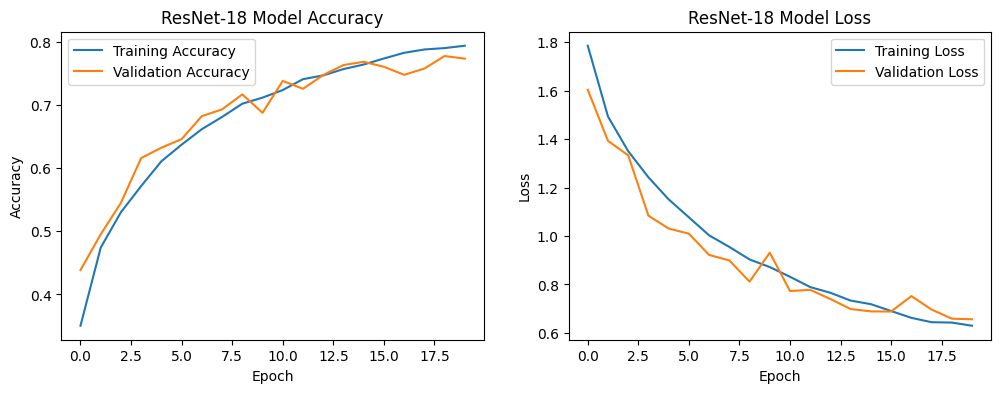

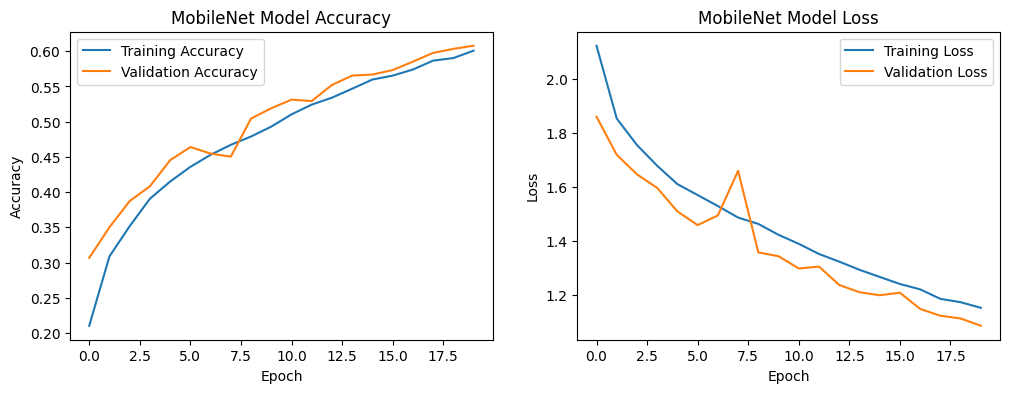

In [9]:
# Evaluate ResNet-18 model
resnet_test_loss, resnet_test_accuracy = resnet_model.evaluate(test_images, test_labels, verbose=2)
print("ResNet-18 Test Accuracy:", resnet_test_accuracy)

# Evaluate MobileNet model
mobilenet_test_loss, mobilenet_test_accuracy = mobilenet_model.evaluate(test_images, test_labels, verbose=2)
print("MobileNet Test Accuracy:", mobilenet_test_accuracy)

# Plot training and validation accuracy and loss for ResNet-18
plt.figure(figsize=(12, 4))

# ResNet-18 Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet-18 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# ResNet-18 Loss plot
plt.subplot(1, 2, 2)
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.title('ResNet-18 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plot training and validation accuracy and loss for MobileNet
plt.figure(figsize=(12, 4))

# MobileNet Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(mobilenet_history.history['accuracy'], label='Training Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# MobileNet Loss plot
plt.subplot(1, 2, 2)
plt.plot(mobilenet_history.history['loss'], label='Training Loss')
plt.plot(mobilenet_history.history['val_loss'], label='Validation Loss')
plt.title('MobileNet Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
